Final parameters (theta):
[[0.9966201]
 [0.0013402]]
[0.04972243697127353, 0.012431505335176627, 0.0031087724261523973, 0.0007780891988963391, 0.0001954183920823236, 4.975069037881814e-05, 1.3333764952942556e-05, 4.2295335964732435e-06, 1.953475757356021e-06, 1.384461297576714e-06, 1.242207682631928e-06, 1.206644278895732e-06, 1.1977534279616794e-06, 1.1955307152281673e-06, 1.1949750370447906e-06, 1.1948361174989444e-06, 1.1948013876124879e-06, 1.1947927051408693e-06, 1.194790534522961e-06, 1.1947899918684936e-06, 1.1947898562048617e-06, 1.1947898222889603e-06, 1.1947898138099884e-06, 1.1947898116902454e-06, 1.1947898111603124e-06, 1.1947898110278176e-06, 1.1947898109947011e-06, 1.1947898109864237e-06, 1.1947898109843532e-06, 1.194789810983827e-06, 1.194789810983707e-06, 1.1947898109836694e-06, 1.194789810983668e-06, 1.194789810983666e-06, 1.1947898109836692e-06, 1.1947898109836645e-06, 1.1947898109836753e-06, 1.1947898109836611e-06, 1.1947898109836643e-06, 1.1947898109836632e-06, 1.19

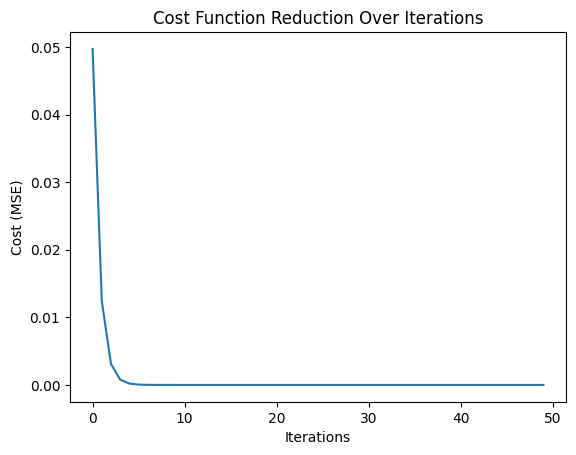

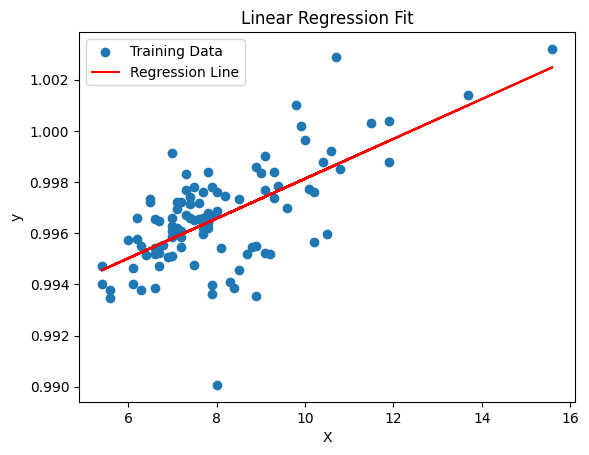

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X_data = pd.read_csv('linearX.csv', header=None)  # No header, data is in the first column
y_data = pd.read_csv('linearY.csv', header=None)

X = X_data.values.reshape(-1, 1)
y = y_data.values.reshape(-1, 1)

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


X_b = np.c_[np.ones((len(X_normalized), 1)), X_normalized]  # Add a column of ones for the intercept


theta = np.random.randn(2, 1)  # 2 parameters: intercept and slope


learning_rate = 0.5
iterations = 50


theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)


print("Final parameters (theta):")
print(theta_final)
print(cost_history)


plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()


plt.scatter(X, y, label="Training Data")
X_fit = (X_normalized * X_std) + X_mean  # Transform normalized X back to the original scale
plt.plot(X_fit, X_b.dot(theta_final), color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
